In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bringing in data collected for 2018
df_2018 = pd.read_csv('2018 water levels.csv')

In [3]:
# use date as index
df_2018 = df_2018.set_index('Datetime')

In [4]:
# change index to datetimeindex
df_2018.index = pd.to_datetime(df_2018.index)

In [5]:
# find daily means from all 2018 records
df_2018_daily = df_2018.resample('D').mean()

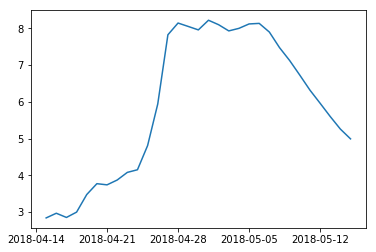

In [6]:
# show 2018 data
plt.plot(df_2018_daily)
plt.show()

In [7]:
# bringing in historical records
df_hist = pd.read_csv('fredericton_daily_water levels.csv', header=2, names=['ID', 'PARAM', 'Date', 'Value', 'SYM'])

In [8]:
# set date as index
df_hist = df_hist.set_index('Date')

In [9]:
# remove unused columns
df_hist = df_hist.drop(columns=['ID', 'PARAM', 'SYM'])

In [10]:
# convert index to datetimeindex
df_hist.index = pd.to_datetime(df_hist.index)

In [11]:
# find records for 1973 and 2008
df_1973 = df_hist.loc['1973/04/15' : '1973/05/15']
df_2008 = df_hist.loc['2008/04/15' : '2008/05/15']

In [12]:
# convert index to datetimeindex 
df_1973.index = pd.to_datetime(df_1973.index)
df_2008.index = pd.to_datetime(df_2008.index)
df_1973.index = pd.to_datetime(df_1973.index)

In [13]:
# remove year from date to simplify placing data on same plot
df_1973.index = df_1973.index.strftime('%m/%d')
df_2008.index = df_2008.index.strftime('%m/%d')
df_2018_daily.index = df_2018_daily.index.strftime('%m/%d')

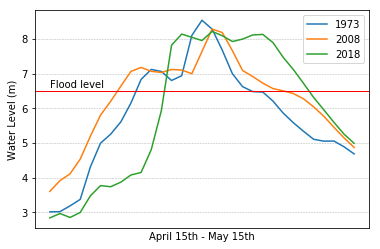

In [14]:
plt.plot(df_1973)
plt.plot(df_2008)
plt.plot(df_2018_daily)
plt.ylabel('Water Level (m)')
plt.xlabel('April 15th - May 15th')
plt.xticks([])
plt.legend(('1973', '2008', '2018'))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.axhline(y=6.5, label='Flood level', color='red', linewidth=1)
plt.text(0, 6.6, 'Flood level')
plt.show()